## [DuckDB in Jupyter Notebooks](https://duckdb.org/docs/guides/python/jupyter)

In [1]:
import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

In [2]:
print(duckdb.__version__)

0.7.1


## Use SQL cell

In [2]:
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [3]:
# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:
# %sql duckdb:///path/to/file.db

In [4]:
%sql SELECT 'Off and flying!' as a_duckdb_column

,a_duckdb_column
0,Off and flying!


In [7]:
%sql my_df << SELECT 'Off and flying!' as a_duckdb_column

In [8]:
my_df

,a_duckdb_column
0,Off and flying!


An entire Jupyter cell can be used as a SQL cell by placing %%sql at the start of the cell. 
Query results will be displayed as a Pandas DF.

** Note **

no string before `%%sql` directive

In [12]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,pg_typeof
2,pg_catalog,pg_type_is_visible
3,pg_catalog,pg_ts_template_is_visible
4,pg_catalog,pg_ts_parser_is_visible


### Querying Pandas Dataframes

In [13]:
input_df = pd.DataFrame.from_dict({"i":[1, 2, 3],
                                  "j":["one", "two", "three"]})

In [14]:
input_df

,i,j
0,1,one
1,2,two
2,3,three


In [15]:
%sql output_df << SELECT sum(i) as total_i FROM input_df

In [16]:
output_df

,total_i
0,6


### Visualizing DuckDB Data

In [17]:
%%sql
INSTALL httpfs;
LOAD httpfs;

""


<AxesSubplot:title={'center':"'trip_distance' from 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'"}, ylabel='trip_distance'>

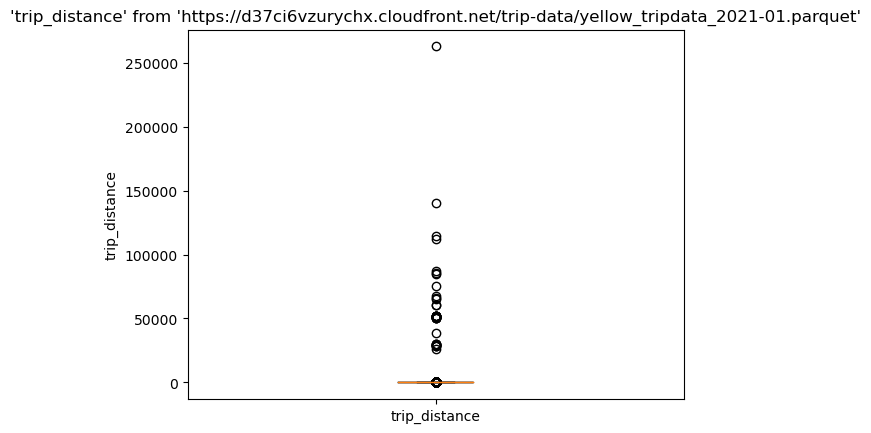

In [18]:
%sqlplot boxplot --table https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet --column trip_distance

In [20]:
%%sql --save short-trips --no-execute
SELECT *
FROM "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet"
WHERE trip_distance < 6.3

Skipping execution...


<AxesSubplot:title={'center':"'trip_distance' from 'short-trips'"}, xlabel='trip_distance', ylabel='Count'>

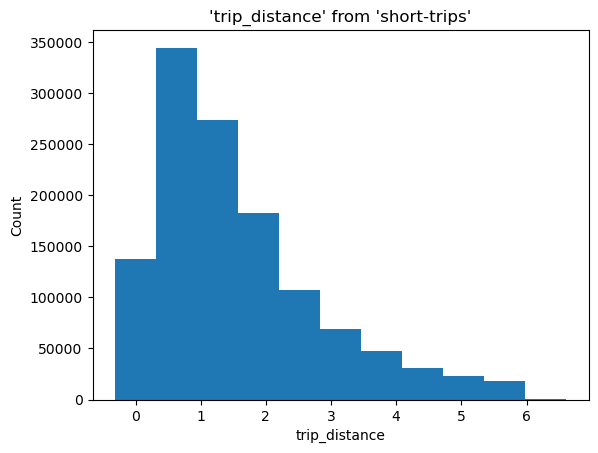

In [21]:
%sqlplot histogram --table short-trips --column trip_distance --bins 10 --with short-trips

## Execute SQL

In [3]:
duckdb.sql("SELECT 42").show()

┌───────┐
│  42   │
│ int32 │
├───────┤
│    42 │
└───────┘



In [4]:
results = duckdb.sql("SELECT 42").fetchall()
print(results)
# [(42,)]

[(42,)]


In [5]:
results = duckdb.sql("SELECT 42").df()
results

,42
0,42


[DuckDB with Polars](https://duckdb.org/docs/guides/python/polars)

In [6]:
results_pl = duckdb.sql("SELECT 42").pl()
results_pl

42
i32
42


## use embedded SQL

In [9]:
conn = duckdb.connect()

In [11]:
conn.execute("""
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
--LIMIT 5
""").df()

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,pg_typeof
2,pg_catalog,pg_type_is_visible
3,pg_catalog,pg_ts_template_is_visible
4,pg_catalog,pg_ts_parser_is_visible
...,...,...
1683,main,%
1684,main,%
1685,main,!~~*
1686,main,!~~
